# Drafting the prototype of what will be a module for adding filtered version of the image


In [1]:
%matplotlib inline

# FilterBasedTransformations: 
- smoothing: gaussian([4:12])
- noise: gaussian(0.01:0.1), speckle(0.01:0.1), salt, pepper, s&p

## Constraints:
- images are 2^8 pixel-depth

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color

img = io.imread('http://imagej.net/_images/9/90/Blobs.png')#data.camera()
img = color.rgb2gray(img)
#img = img.astype(np.uint16)
print(img.dtype) 

float64


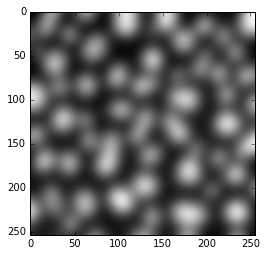

In [8]:
gaussian_param = 8 
import skimage.filters as filters

out1 = filters.gaussian(img, gaussian_param)
plt.imshow(out1,cmap='gray');

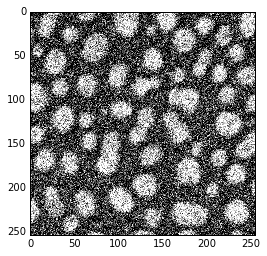

In [9]:
noise_gaussian_param = 0.1
import skimage.util as util
out2=util.random_noise(img, mode='gaussian', seed=None, clip=True, mean=0, var=noise_gaussian_param)
#plt.imshow(out,vmin=0,vmax=1, cmap='gray', interpolation='nearest');
plt.imshow(out2, cmap='gray', interpolation='nearest');

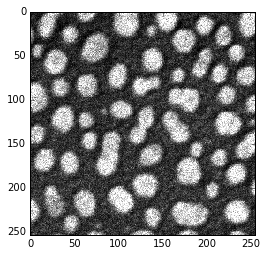

In [10]:
out3=util.random_noise(img, mode='poisson', seed=None, clip=True)
plt.imshow(out3, cmap='gray', interpolation='nearest');


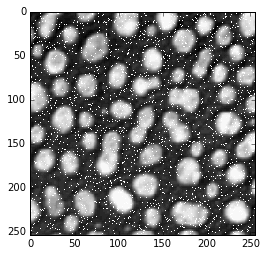

In [11]:
out4=util.random_noise(img, mode='salt', seed=None, clip=True)
plt.imshow(out4, cmap='gray', interpolation='nearest');

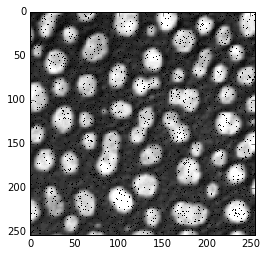

In [12]:
out5=util.random_noise(img, mode='pepper', seed=None, clip=True)
plt.imshow(out5, cmap='gray', interpolation='nearest');

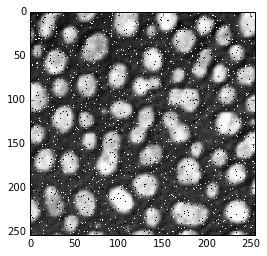

In [13]:
out6=util.random_noise(img, mode='s&p', seed=None, clip=True)
plt.imshow(out6, cmap='gray', interpolation='nearest');

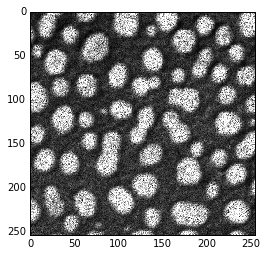

In [14]:
noise_speckle_param = 0.1
import skimage.util as util
out7=util.random_noise(img, mode='speckle', seed=None, clip=True, mean=0, var=noise_speckle_param)
#plt.imshow(out,vmin=0,vmax=1, cmap='gray', interpolation='nearest');
plt.imshow(out7, cmap='gray', interpolation='nearest');

# Time to think on how to allow interacting with the parameter space

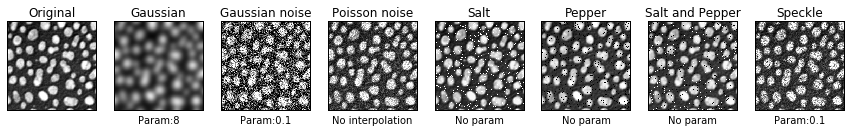

In [15]:
from IPython.html.widgets import interact, fixed
from matplotlib import cm as colormaps
import matplotlib.colors
import inspect

@interact(image=fixed(img),
          defaultparams=False,
          interpolation=['gaussian_smoothing', 'gaussian_noise', 'poisson_noise',
                         'salt','pepper','s&p','speckle'])
def imshow_params(image, defaultparams=False, interpolation='bicubic'):
    fig, axes = plt.subplots(1, 8, figsize=(15, 8))


    axes[0].imshow(image, cmap='gray', interpolation='nearest')
    axes[0].set_title('Original')

    axes[1].imshow(out1, cmap='gray', interpolation='nearest')
    axes[1].set_title('Gaussian')
    axes[1].set_xlabel('Param:'+str(gaussian_param))

    axes[2].imshow(out2, cmap='gray', interpolation='nearest')
    axes[2].set_title('Gaussian noise')
    axes[2].set_xlabel('Param:'+str(noise_gaussian_param))

    axes[3].imshow(out3, cmap='gray', interpolation='nearest')
    axes[3].set_title('Poisson noise')
    axes[3].set_xlabel('No interpolation')

    axes[4].imshow(out4, cmap='gray', interpolation='nearest')
    axes[4].set_title('Salt')
    axes[4].set_xlabel('No param')
    
    axes[5].imshow(out5, cmap='gray', interpolation='nearest')
    axes[5].set_title('Pepper')
    axes[5].set_xlabel('No param')
    
    axes[6].imshow(out6, cmap='gray', interpolation='nearest')
    axes[6].set_title('Salt and Pepper')
    axes[6].set_xlabel('No param')
    
    axes[7].imshow(out7, cmap='gray', interpolation='nearest')
    axes[7].set_title('Speckle')
    axes[7].set_xlabel('Param:'+str(noise_speckle_param))

    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])

NameError: name 'out1' is not defined

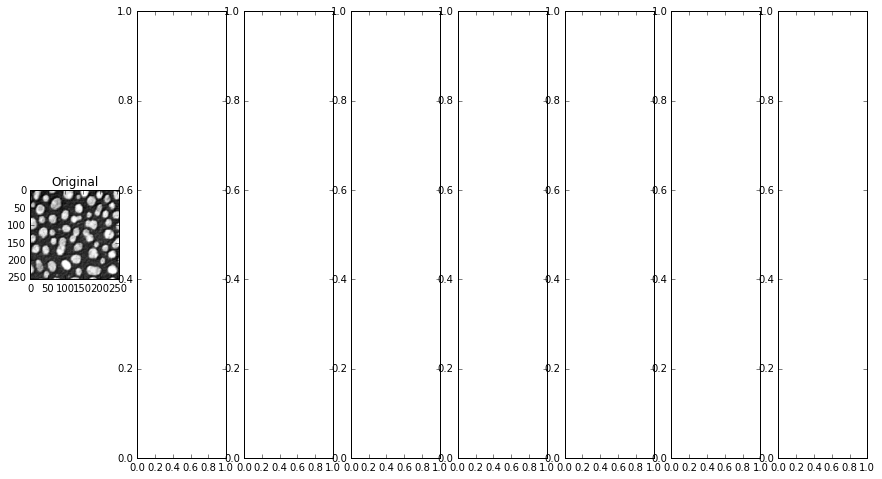

In [5]:
#todo: 
from IPython.html.widgets import interact, fixed
from matplotlib import cm as colormaps
import matplotlib.colors
import inspect

@interact(image=fixed(img),
          defaultparams=False,
          imageModification=['gaussian_smoothing', 'gaussian_noise', 'poisson_noise',
                         'salt','pepper','s&p','speckle'])
def imshow_params(image, defaultparams=False, imageModification='imageModification'):
    fig, axes = plt.subplots(1, 8, figsize=(15, 8))


    axes[0].imshow(image, cmap='gray', interpolation='nearest')
    axes[0].set_title('Original')

    axes[1].imshow(out1, cmap='gray', interpolation='nearest')
    axes[1].set_title('Gaussian')
    axes[1].set_xlabel('Param:'+str(gaussian_param))

    axes[2].imshow(out2, cmap='gray', interpolation='nearest')
    axes[2].set_title('Gaussian noise')
    axes[2].set_xlabel('Param:'+str(noise_gaussian_param))

    axes[3].imshow(out3, cmap='gray', interpolation='nearest')
    axes[3].set_title('Poisson noise')
    axes[3].set_xlabel('No interpolation')

    axes[4].imshow(out4, cmap='gray', interpolation='nearest')
    axes[4].set_title('Salt')
    axes[4].set_xlabel('No param')
    
    axes[5].imshow(out5, cmap='gray', interpolation='nearest')
    axes[5].set_title('Pepper')
    axes[5].set_xlabel('No param')
    
    axes[6].imshow(out6, cmap='gray', interpolation='nearest')
    axes[6].set_title('Salt and Pepper')
    axes[6].set_xlabel('No param')
    
    axes[7].imshow(out7, cmap='gray', interpolation='nearest')
    axes[7].set_title('Speckle')
    axes[7].set_xlabel('Param:'+str(noise_speckle_param))

    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])

In [58]:
#tools to debug code below

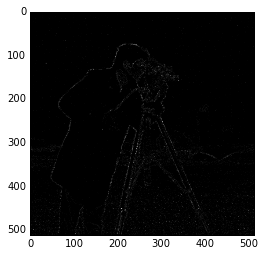

In [115]:
#this is NOT what you need if you want to add noise
from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import noise_filter
img = data.camera()
out = noise_filter(img, disk(5))
plt.imshow(out,cmap='gray');

In [95]:
np.iinfo(np.uint16)

iinfo(min=0, max=65535, dtype=uint16)

In [116]:
image = np.zeros((20, 20), dtype=np.uint8)
image[5:15, 5:15] = 255

0 255 uint8


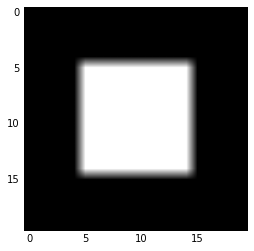

In [117]:
plt.imshow(image,cmap='gray'); #an input image
print(image.min(), image.max(), image.dtype)

In [132]:
#You 
image = image.astype(np.uint16)
print(image.dtype) 

uint16
uint16


float32


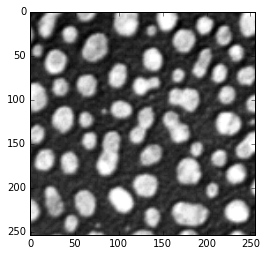

In [28]:
#Only using scipy
from scipy import ndimage
img = ndimage.imread("/Users/dani11/Dropbox/prog/Python/ImageXD/imageXDaugmentation/examples/Blobs.png",flatten=True, mode=None)
plt.imshow(img,cmap='gray');
print(img.dtype) 

float32


/Users/dani11/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


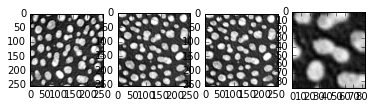

In [34]:
plt.subplot(141)
plt.imshow(img,cmap='gray');
print(img.dtype)

angle = 90
#Rotate
img1 = ndimage.rotate(img, angle)
plt.subplot(142)
plt.imshow(img1,cmap='gray');
#Rotate no reshape
img1_noreshape = ndimage.rotate(img, angle, reshape=False)
plt.subplot(143)
plt.imshow(img1_noreshape,cmap='gray');
#Rotate and crop
lx, ly = img.shape
img1 = ndimage.rotate(img, angle)
crop_img1 = img1[lx/3:-lx/3, ly/3:-ly/3]
plt.subplot(144)
plt.imshow(crop_img1,cmap='gray');

In [35]:
img.shape

(254, 256)

In [41]:
def rotate(img,number_rotate):
    theta = np.int(360/number_rotate)
    ang = range(0,360,theta)
    list_images = []
    for i in ang:
        im_rotated = ndimage.rotate(img,i) #.astype(np.uint8)
        list_images.append(im_rotated)
    return list_images

listRotations=rotate(img,4)


In [ ]:
def fAugmentation(img, bPoisson=True, bSpeckle=True, bGaussian=True, b3Rotations=True):
    """ Function to augment input sample, i.e., create new samples with realistic distortions
    Args:
    
    Returns:
        List with new images
    """
    output = []
    imgPoisson=util.random_noise(img, mode='poisson', seed=None, clip=True, mean=0, var=noise_speckle_param)
    imgSpeckle=util.random_noise(img, mode='speckle', seed=None, clip=True, mean=0, var=noise_speckle_param)
    imgGaussian =util.random_noise(img, mode='gaussian',seed=None, clip=True, mean=0, var=noise_speckle_param)

    listRotations=rotate(img,4)
    return output